<a href="https://colab.research.google.com/github/tanvibattu/deep-learning-practice/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist
from keras.optimizers import RMSprop


In [0]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [0]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000,784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
#normalise inputs by dividing by 255
train_images /= 255
test_images /= 255 

In [0]:
#convert 0-9 labels into "one-hot" format 
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


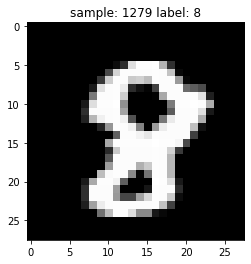

In [7]:
import matplotlib.pyplot as plt
def display_sample(num):
  print(train_labels[num])
  label = train_labels[num].argmax(axis=0)
  image = train_images[num].reshape([28,28])
  plt.title('sample: %d label: %d' %(num,label))
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.show()
display_sample(1279)

In [0]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0,2))

model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=200,
                    epochs=30,
                    verbose=0,
                    validation_data=(test_images,test_labels))

In [0]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Loss: %.2f"%(score[0]*100))
print("Accuracy: %.2f"%(score[1]*100))
print("Training loss: %.2f"%(history.history['loss'][9]*100))
print("Validation loss: %.2f"%(history.history['val_loss'][9]*100))


In [0]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.title("Training and Validation loss")
plt.plot(epochs,loss,'y',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)
plt.title("Training and Validation Accuracy")
plt.plot(epochs,acc,'y',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.show()